<a href="https://colab.research.google.com/github/18PrajeetR/car-accident-death-insurance-prediction/blob/main/InsuranceClaim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/insurance.csv');
df

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


In [ ]:
# here target means output variable : insuranceclaim (1/0)
df["insuranceclaim"].unique()

array([1, 0])

In [ ]:
# how many sample of 1's and 0's category
df["insuranceclaim"].value_counts()

,count
insuranceclaim,
1,783
0,555


In [ ]:
df.shape

(1338, 8)

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0
insuranceclaim,0


In [ ]:
# we can also cross check for null values
df.dtypes

# here data types are correct so no null valuess

,0
age,int64
sex,int64
bmi,float64
children,int64
smoker,int64
region,int64
charges,float64
insuranceclaim,int64


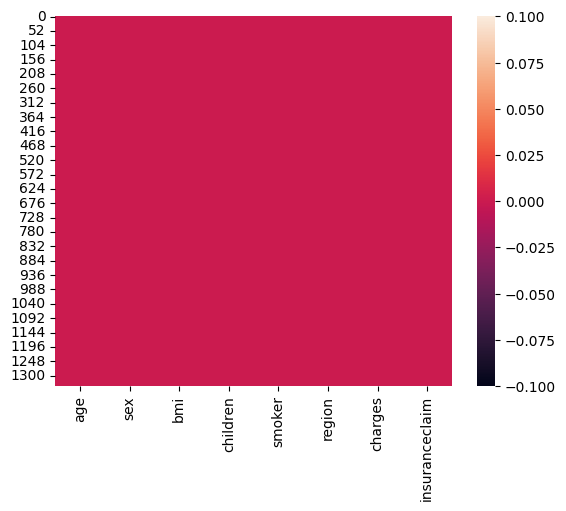

In [ ]:
# visualization for null values
sns.heatmap(df.isnull())
plt.show()

In [ ]:
# to check duplicate rows
df.duplicated().sum()

np.int64(1)

In [ ]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
581,19,1,30.59,0,0,1,1639.5631,1


In [ ]:
# to remove duplicates row permanantly : drop_duplicates()
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['sex'].value_counts()

,count
sex,
1,675
0,662


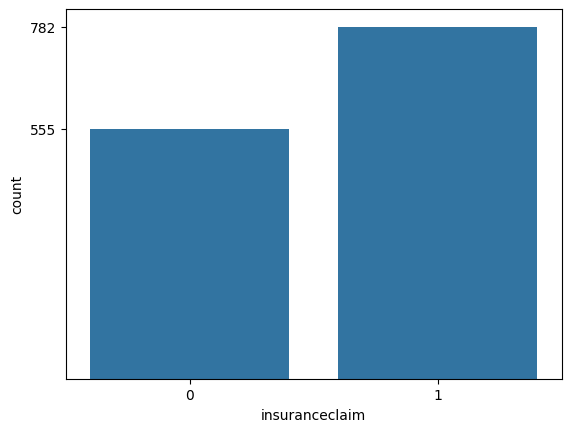

In [ ]:
# visualization
sns.countplot(data=df,x="insuranceclaim")
f=df["insuranceclaim"].value_counts()
plt.yticks(f)
plt.show()

# Tip - for categorical values use countplot graph

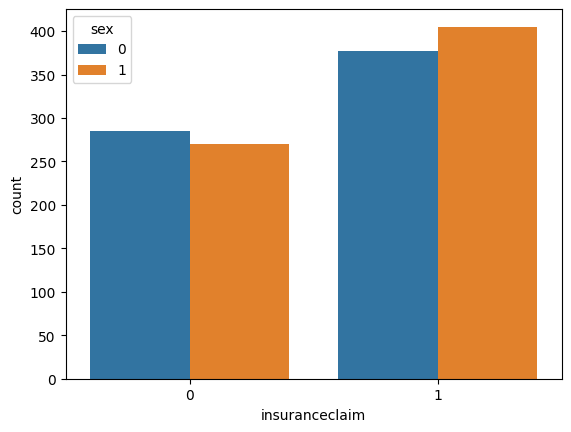

In [ ]:
# to check the input sex is imp feature to predict the output insuranceclaim
sns.countplot(data=df,x='insuranceclaim',hue='sex')
# here X=output variable & hue=input variable (categorical type)
plt.show()

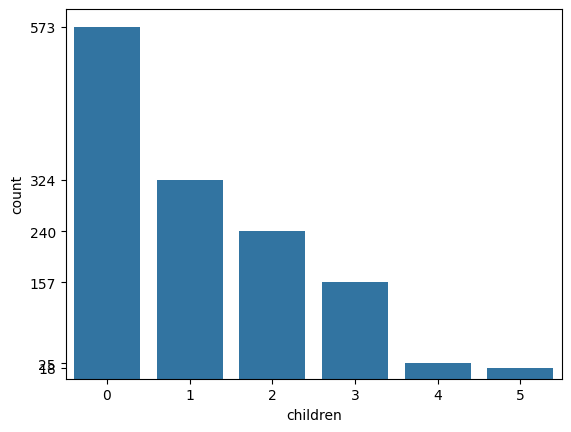

In [ ]:
sns.countplot(data=df,x='children')
f=df['children'].value_counts()
plt.yticks(f)
plt.show()

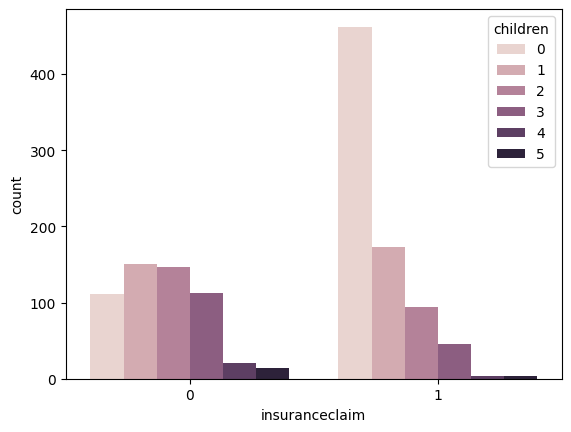

In [ ]:
# to check the input "children" is imp feature to predict the output insuranceclaim
sns.countplot(data=df,x='insuranceclaim',hue='children')
plt.show()

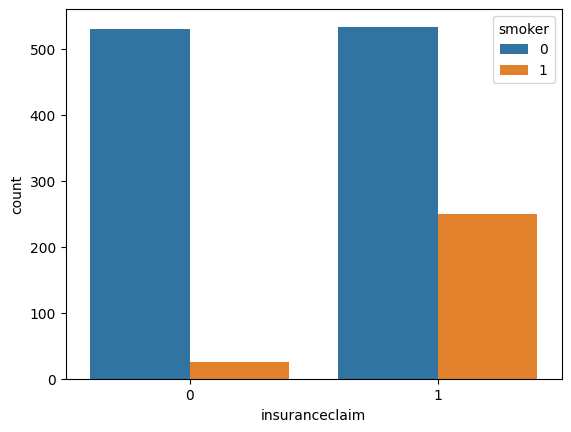

In [ ]:
# to check the input "smoker" is imp feature to predict the output insuranceclaim
sns.countplot(data=df,x='insuranceclaim',hue='smoker')
plt.show()

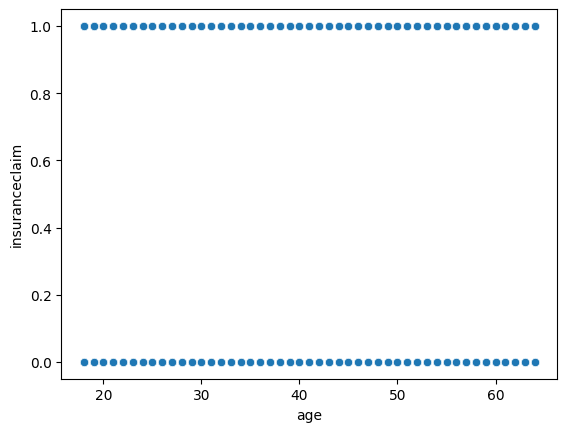

In [ ]:
# to check the input "age" is imp feature to predict the output insuranceclaim
sns.scatterplot(data=df,x='age',y='insuranceclaim')
# here x=input variable & y=output variable
plt.show()

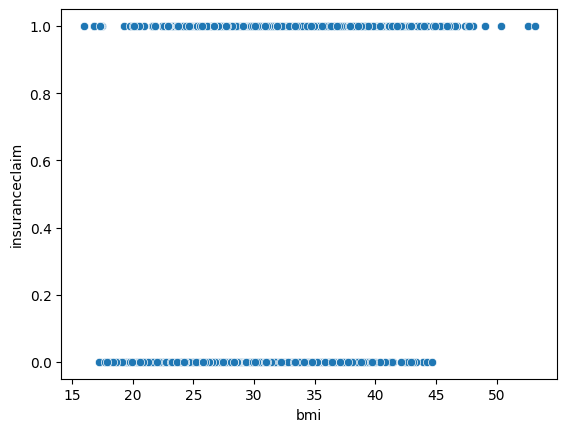

In [ ]:
# to check the input "bmi" is imp feature to predict the output insuranceclaim
sns.scatterplot(data=df,x='bmi',y='insuranceclaim')
# here x=input variable & y=output variable
plt.show()

In [ ]:
# select input & output from given dataset
X=df.drop("insuranceclaim",axis=1)      # input
Y=df['insuranceclaim']   # output

In [ ]:
X.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [ ]:
Y.head()

,insuranceclaim
0,1
1,1
2,0
3,0
4,1


In [ ]:
#Train - Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [ ]:
X_train.shape, X_test.shape

((935, 7), (402, 7))

In [ ]:
X_train.head()

,age,sex,bmi,children,smoker,region,charges
520,50,0,27.360,0,0,0,25656.57526
575,58,0,27.170,0,0,1,12222.89830
770,61,1,36.100,3,0,3,27941.28758
314,27,0,31.400,0,1,3,34838.87300
426,38,0,27.265,1,0,0,6555.07035


In [ ]:
# Apply Scaling : StandardScaler
from sklearn.preprocessing import StandardScaler
# create object of StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [ ]:
X_train

array([[ 0.76935907, -1.05611771, -0.54584829, ..., -0.53158148,
        -1.38997482,  0.97973397],
       [ 1.34169182, -1.05611771, -0.57768002, ..., -0.53158148,
        -0.48304777, -0.11634023],
       [ 1.5563166 ,  0.94686415,  0.91841121, ..., -0.53158148,
         1.33080632,  1.16614713],
       ...,
       [-1.23380557,  0.94686415,  0.5280537 , ..., -0.53158148,
         0.42387927, -0.97698935],
       [ 0.05394313, -1.05611771, -1.40698031, ...,  1.88117914,
         0.42387927,  0.47286216],
       [ 1.41323342,  0.94686415,  1.76278969, ...,  1.88117914,
         0.42387927,  2.88193206]])

In [ ]:
X_test

array([[ 0.3401095 , -1.05611771,  1.39588714, ...,  1.88117914,
        -0.48304777,  2.3934608 ],
       [ 1.27015023,  0.94686415,  0.15444973, ..., -0.53158148,
        -0.48304777, -0.18729799],
       [ 1.12706704, -1.05611771,  0.29769251, ..., -0.53158148,
        -1.38997482, -0.14439093],
       ...,
       [ 0.98398385,  0.94686415, -1.54435935, ..., -0.53158148,
         1.33080632, -0.29237275],
       [-1.30534716, -1.05611771, -0.70668229, ..., -0.53158148,
         1.33080632, -0.9016684 ],
       [-1.01918078,  0.94686415, -0.73683866, ..., -0.53158148,
        -1.38997482, -0.89158843]])

In [ ]:
#Logistic Regresssion
# Now create the Model with the help of logistic regression.
from sklearn.linear_model import LogisticRegression

In [ ]:
# create the object of LogisticRegression class
lr=LogisticRegression()

In [ ]:
# Train The Model with 70% data, use fit(): inbuilt  method of LogisticRegression class
lr.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
# Test the nodel with 30% data, use predict() function of sigmoid function (logit function)   Y_pred=1/(1+np.exp(-X))
# This equation gives the probability value
Y_pred=lr.predict(X_test)
Y_pred      # np.where (Y_pred>=0.5,1,0)

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
# create a dictionary
dict={"Actual Output":Y_test,"Predicted Output":Y_pred}
# convert into dataframe
df1=pd.DataFrame(dict)
df1.head(20)

,Actual Output,Predicted Output
629,1,1
1087,1,1
283,1,1
790,1,1
594,1,1
579,0,0
478,1,1
255,1,0
350,0,1
262,1,1


from matplotlib import pyplot as plt
_df_0['Actual Output'].plot(kind='hist', bins=20, title='Actual Output')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Predicted Output'].plot(kind='hist', bins=20, title='Predicted Output')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Actual Output', y='Predicted Output', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Actual Output'].plot(kind='line', figsize=(8, 4), title='Actual Output')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Predicted Output'].plot(kind='line', figsize=(8, 4), title='Predicted Output')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# find the scores
# There are 4 types of score in Classification Algorithm.

# 1) Recall score   2) precision score   3) F1-score   4) Accuracy
# Find the score means accuracy score of model
# score() : inbuilt method of LogisticRegression class
# it is also known as Accuracy score of model
# formula = (TP+FN)/(TP+FP+FN+TN)              # T=True,  F=False,  P=Positive,  N=Negative
lr.score(X_test,Y_test)

0.8855721393034826

In [ ]:
# Print report
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       172
           1       0.89      0.91      0.90       230

    accuracy                           0.89       402
   macro avg       0.88      0.88      0.88       402
weighted avg       0.89      0.89      0.89       402



In [ ]:
# generate confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,Y_pred))

[[147  25]
 [ 21 209]]


In [ ]:
#2. Decision Tree Classification :
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# gini index :

# create the object of class DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=1)
# by default use gini index : formula = 1-P**2-Q**2

In [ ]:
# train the model with 70% training data
dt.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
# To test the model 30% data
# use predict() : inbuilt method
Y_pred=dt.predict(X_test)
Y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
# create a dataframe of Y_test & Y_pred with the help of dictionary
dict={"Actual Output":Y_test,"Predicted Output":Y_pred}
df1=pd.DataFrame(dict)
df1

,Actual Output,Predicted Output
629,1,1
1087,1,1
283,1,1
790,1,1
594,1,1
...,...,...
924,0,0
873,1,0
731,0,0
363,0,0


from matplotlib import pyplot as plt
df1['Actual Output'].plot(kind='hist', bins=20, title='Actual Output')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df1['Predicted Output'].plot(kind='hist', bins=20, title='Predicted Output')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df1.plot(kind='scatter', x='Actual Output', y='Predicted Output', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df1['Actual Output'].plot(kind='line', figsize=(8, 4), title='Actual Output')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df1['Predicted Output'].plot(kind='line', figsize=(8, 4), title='Predicted Output')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# To Show information gain of each features
# Use inbuilt attributes : feature_importances_ of DecisionTreeClassifier class

IG=dt.feature_importances_

col=X.columns     # columns inbuilt attributes

# create a dictionary
dict={"Input Column":col,"Information gain":IG}
df2=pd.DataFrame(dict)
df2

,Input Column,Information gain
0,age,0.082568
1,sex,0.000000
2,bmi,0.330158
3,children,0.377550
4,smoker,0.180860
5,region,0.000000
6,charges,0.028864


In [ ]:
# sorting df2 with the help of IG
# use sort_values : inbuilt function of pandas
df2.sort_values("Information gain",ascending=False)

,Input Column,Information gain
3,children,0.377550
2,bmi,0.330158
4,smoker,0.180860
0,age,0.082568
6,charges,0.028864
1,sex,0.000000
5,region,0.000000


from matplotlib import pyplot as plt
_df_5['Information gain'].plot(kind='hist', bins=20, title='Information gain')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('Input Column').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Information gain'].plot(kind='line', figsize=(8, 4), title='Information gain')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['Input Column'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='Information gain', y='Input Column', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# print report :
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       172
           1       0.98      0.96      0.97       230

    accuracy                           0.97       402
   macro avg       0.97      0.97      0.97       402
weighted avg       0.97      0.97      0.97       402



In [ ]:
# generate confusion matrix
from sklearn.metrics import classification_report
print(confusion_matrix(Y_test,Y_pred))

[[168   4]
 [  9 221]]


In [ ]:
# By Using Entropy :

# create the object of class DecisionTreeClassifier
dt1 = DecisionTreeClassifier(random_state=1,criterion="entropy")

# entropy = -P*log(P)-Q*log(Q)    # Note : base of log=2